# NLP for writers

## 1. Data mining  

In [3]:
# import modules 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import requests 
from bs4 import BeautifulSoup
import pickle
import re 
from sklearn.feature_extraction.text import CountVectorizer  
from textblob import TextBlob

In [4]:
# getting the data 
urls = ['https://scrapsfromtheloft.com/2020/07/28/little-red-riding-hood-perrault-censorship/',
       'https://scrapsfromtheloft.com/2020/07/28/censorship-in-literature-fahrenheit-451/',
       'https://scrapsfromtheloft.com/2020/07/10/the-good-shepherd-c-s-forester-review/',
       'https://scrapsfromtheloft.com/2020/06/13/eight-oclock-in-the-morning-ray-nelson/',
       'https://scrapsfromtheloft.com/2020/06/27/book-review-thomas-ligotti-the-conspiracy-against-the-human-race-a-contrivance-of-horror/',
       'https://scrapsfromtheloft.com/2020/06/11/stanley-ellin-the-specialty-of-the-house/',
       'https://scrapsfromtheloft.com/2020/06/11/stanley-ellin-the-specialty-of-the-house/',
       'https://scrapsfromtheloft.com/2020/05/28/censorship-in-literature-of-mice-and-men/',
       'https://scrapsfromtheloft.com/2020/05/21/expendable-philip-k-dick/',
       'https://scrapsfromtheloft.com/2020/04/19/dostoevsky-brothers-karamazov-alberto-camus/',
       'https://scrapsfromtheloft.com/2020/04/10/john-updike-at-war-with-my-skin/',
       'https://scrapsfromtheloft.com/2020/04/20/birdman-of-alcatraz-story/']

writers = ['Charles Perrault', 'Ray Bradbury', 'Burke Wilkinson', 'Ray Nelson',
           'Thomas Ligotti', 'Stanley Ellin', 'Stephen H. Goldman', 'John Steinbeck',
           'Philip K. Dick', 'Albert Camus', 'John Updike', 'Thomas E. Gaddis'                                      
          ]

# let's creat a function to pull the text out from he websites 

def text(url):
    '''Pull the data text from the gien urls'''
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    text = [data.text for data in soup.find(class_='post-content').find_all('p')]
    print(url)
    return text

In [17]:
# Run our function on the urls 
texts = [text(url) for url in urls]

https://scrapsfromtheloft.com/2020/07/28/little-red-riding-hood-perrault-censorship/
https://scrapsfromtheloft.com/2020/07/28/censorship-in-literature-fahrenheit-451/
https://scrapsfromtheloft.com/2020/07/10/the-good-shepherd-c-s-forester-review/
https://scrapsfromtheloft.com/2020/06/13/eight-oclock-in-the-morning-ray-nelson/
https://scrapsfromtheloft.com/2020/06/27/book-review-thomas-ligotti-the-conspiracy-against-the-human-race-a-contrivance-of-horror/
https://scrapsfromtheloft.com/2020/06/11/stanley-ellin-the-specialty-of-the-house/
https://scrapsfromtheloft.com/2020/06/11/stanley-ellin-the-specialty-of-the-house/
https://scrapsfromtheloft.com/2020/05/28/censorship-in-literature-of-mice-and-men/
https://scrapsfromtheloft.com/2020/05/21/expendable-philip-k-dick/
https://scrapsfromtheloft.com/2020/04/19/dostoevsky-brothers-karamazov-alberto-camus/
https://scrapsfromtheloft.com/2020/04/10/john-updike-at-war-with-my-skin/
https://scrapsfromtheloft.com/2020/04/20/birdman-of-alcatraz-stor

In [26]:
# pickle the files for each writer 

for index, writer in enumerate(writers):
    with open('texts/'+ writer + '.txt', 'wb') as file:
        pickle.dump(texts[index], file)

In [5]:
# read the data into a dict 

data = {}

for index, writer in enumerate(writers):
    with open('texts/' + writer + '.txt', 'rb') as file: 
        data[writer] = pickle.load(file)
        
data.keys()        

dict_keys(['Charles Perrault', 'Ray Bradbury', 'Burke Wilkinson', 'Ray Nelson', 'Thomas Ligotti', 'Stanley Ellin', 'Stephen H. Goldman', 'John Steinbeck', 'Philip K. Dick', 'Albert Camus', 'John Updike', 'Thomas E. Gaddis'])

In [6]:
# combining all the chunks into one single text 

def combine(text):
    '''Combine all the chunks into one single big text'''
    text = ' '.join([i for i in text])
    return text
       
data =   {key : [combine(value)] for (key, value) in data.items()}

 # check our text
data['Albert Camus']

['Ivan Karamazov and the Rebellion against God by Albert Camus If the romantic rebel extols evil and the individual, this does not mean that he sides with mankind, but merely with himself. Dandyism, of whatever kind, is always dandyism in relation to God. The individual, in so far as he is a created being, can oppose himself only to the Creator. He has need of God, with whom he carries on a kind of a gloomy flirtation. Armand Hoog1 rightly says that, despite its Nietzschean atmosphere, God is not yet dead even in romantic literature. Damnation, so clamorously demanded, is only a clever trick played on God. But with Dostoevsky the description of rebellion goes a step farther. Ivan Karamazov sides with mankind and stresses human innocence. He affirms that the death sentence which hangs over them is unjust. Far from making a plea for evil, his first impulse, at least, is to plead for justice, which he ranks above the divinity. Thus he does not absolutely deny the existence of God. He refu

In [7]:
# creat a coprus 

corpus = pd.DataFrame.from_dict(data).transpose()
corpus.columns = ['text']
corpus.sort_index(inplace = True)
corpus

,text
Albert Camus,Ivan Karamazov and the Rebellion against God b...
Burke Wilkinson,by Burke Wilkinson C. S. Forester has two skil...
Charles Perrault,Author: Charles Perrault\nOriginal dates and p...
John Steinbeck,OF MICE AND MEN Author: John Steinbeck\nOrigin...
John Updike,PERSONAL HISTORY telling how the writer has li...
Philip K. Dick,by Philip K. Dick Here’s a wry little story—bu...
Ray Bradbury,FAHRENHEIT 451\nAuthor: Ray Bradbury\nOriginal...
Ray Nelson,"Here’s one of the classic SF paranoia stories,..."
Stanley Ellin,"by Stanley Ellin “And this,” said Laffler, “is..."
Stephen H. Goldman,"by Stanley Ellin “And this,” said Laffler, “is..."


In [8]:
corpus.text.iloc[0]

'Ivan Karamazov and the Rebellion against God by Albert Camus If the romantic rebel extols evil and the individual, this does not mean that he sides with mankind, but merely with himself. Dandyism, of whatever kind, is always dandyism in relation to God. The individual, in so far as he is a created being, can oppose himself only to the Creator. He has need of God, with whom he carries on a kind of a gloomy flirtation. Armand Hoog1 rightly says that, despite its Nietzschean atmosphere, God is not yet dead even in romantic literature. Damnation, so clamorously demanded, is only a clever trick played on God. But with Dostoevsky the description of rebellion goes a step farther. Ivan Karamazov sides with mankind and stresses human innocence. He affirms that the death sentence which hangs over them is unjust. Far from making a plea for evil, his first impulse, at least, is to plead for justice, which he ranks above the divinity. Thus he does not absolutely deny the existence of God. He refut

In [9]:
# Text pre-processing technics 

def clean(text):
    '''Clean the text from none relevant information like pounctuations ... etc'''
    text = text.lower()
    text = re.sub('\[*\]*', '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[“”()*;‘]', '', text)  
    text = re.sub('[.,’:?!—-]', '', text)
    text = re.sub('\d+|©  |inc.', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub('url\s+', '', text)
    text = re.sub(r'\w+//\w+/[\w/]+', '', text) 
    text = re.sub(r'available online', '', text)
    return text.strip(' ')

corpus = pd.DataFrame(corpus.text.apply(clean))
corpus
corpus.to_pickle('output/corpus.pkl')

In [10]:
corpus.text.iloc[4]

'personal history telling how the writer has lived with psoriasis a skin ailment it is a metabolic disorder that causes the epidermis which normally replaces itself in the course of several days to speed up the process and to produce excess skin cells a tendency to it is inherited the writers mother had it and her mother had it the disease favors the fair the dryskinned it keeps you thinking strategies of concealment ramify and selfexamination is endless because of his skin problem writer chose a profession that did not demand being presentable he married young because he found a comely & gracious female who forgave him his skin they moved to ipswich mass because the town had a great beach baking in the sun on the beach relieved the skin symptoms tells about their life in ipswich in august to escape local biting flies they left and rented a house in marthas vineyard in the winter he went to the caribbean for the sun tells about these visits in the fall of he left his wife and ipswich t

In [11]:
# creat a document-term matrix 

cv = CountVectorizer(stop_words = 'english', ngram_range = (1,1), analyzer = 'word')
data_cv = cv.fit_transform(corpus.text)
dtm = pd.DataFrame(data_cv.toarray(), columns= cv.get_feature_names())
dtm.index = corpus.index
dtm.to_pickle('output/dtm.pkl')
dtm

,abandoned,abide,ability,able,abnormal,abolished,abolition,abortion,abound,abruptly,...,youll,young,younger,youngish,youre,youth,youve,zapffehold,zipes,zosime
Albert Camus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Burke Wilkinson,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Charles Perrault,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,0,2,0
John Steinbeck,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
John Updike,0,0,0,0,1,0,0,0,0,0,...,0,6,0,1,0,0,0,0,0,0
Philip K. Dick,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Ray Bradbury,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Ray Nelson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Stanley Ellin,0,0,0,0,0,0,0,0,0,3,...,3,0,0,0,7,0,1,0,0,0
Stephen H. Goldman,0,0,0,0,0,0,0,0,0,3,...,3,0,0,0,7,0,1,0,0,0


## 2. Exploratory Data Analysis (EDA)

In this section we will be exploring:

* Top words for each writers (most common words).
* Vocabulary size for each writers (unique words).

In [12]:
eda = dtm.transpose()
eda

,Albert Camus,Burke Wilkinson,Charles Perrault,John Steinbeck,John Updike,Philip K. Dick,Ray Bradbury,Ray Nelson,Stanley Ellin,Stephen H. Goldman,Thomas E. Gaddis,Thomas Ligotti
abandoned,0,0,0,0,0,0,0,0,0,0,1,0
abide,0,0,0,0,0,0,0,0,0,0,0,1
ability,0,0,0,0,0,0,0,0,0,0,1,1
able,0,2,0,1,0,0,0,0,0,0,1,0
abnormal,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
youth,0,0,0,1,0,0,0,0,0,0,1,0
youve,0,0,0,0,0,0,0,0,1,1,0,0
zapffehold,0,0,0,0,0,0,0,0,0,0,0,1
zipes,0,0,2,0,0,0,0,0,0,0,0,0


In [13]:
# Pulling top 50 words for each writer 

top_words = {}
for writer in eda.columns:
    top = eda[writer].sort_values(ascending = False).head(30)
    top_words[writer] = list(zip(top.index, top.values))
    
top_words

{'Albert Camus': [('ivan', 31),
  ('god', 27),
  ('rebellion', 15),
  ('evil', 11),
  ('does', 10),
  ('world', 10),
  ('death', 9),
  ('permitted', 9),
  ('suffering', 9),
  ('truth', 9),
  ('creation', 8),
  ('moment', 8),
  ('man', 8),
  ('life', 8),
  ('immortality', 7),
  ('faith', 7),
  ('father', 7),
  ('fact', 7),
  ('grand', 6),
  ('rejects', 6),
  ('says', 6),
  ('crime', 6),
  ('killed', 6),
  ('live', 6),
  ('mankind', 5),
  ('virtue', 5),
  ('far', 5),
  ('rebels', 5),
  ('dostoevsky', 5),
  ('inquisitors', 5)],
 'Burke Wilkinson': [('krause', 8),
  ('good', 7),
  ('shepherd', 6),
  ('man', 4),
  ('sense', 4),
  ('story', 4),
  ('action', 3),
  ('fear', 3),
  ('forester', 3),
  ('participation', 3),
  ('like', 3),
  ('novel', 3),
  ('time', 3),
  ('identification', 3),
  ('burke', 2),
  ('ends', 2),
  ('new', 2),
  ('foresters', 2),
  ('wilkinson', 2),
  ('war', 2),
  ('come', 2),
  ('command', 2),
  ('ships', 2),
  ('men', 2),
  ('master', 2),
  ('make', 2),
  ('writing',

In [14]:
# printing 15 top words for each writer 

for writer, list in top_words.items():
    print(writer + ':')
    print(' ,'.join([word for word, number in list[:14]]))
    print('- -')
    print()

Albert Camus:
ivan ,god ,rebellion ,evil ,does ,world ,death ,permitted ,suffering ,truth ,creation ,moment ,man ,life
- -

Burke Wilkinson:
krause ,good ,shepherd ,man ,sense ,story ,action ,fear ,forester ,participation ,like ,novel ,time ,identification
- -

Charles Perrault:
little ,wolf ,red ,grandmother ,ridinghood ,girl ,hood ,tales ,riding ,story ,got ,book ,wine ,grandmamma
- -

John Steinbeck:
school ,novel ,book ,men ,profanity ,reading ,board ,high ,mice ,lennie ,parents ,parent ,language ,removed
- -

John Updike:
skin ,psoriasis ,did ,sun ,mother ,like ,naked ,young ,good ,time ,face ,came ,went ,summer
- -

Philip K. Dick:
man ,came ,said ,time ,spider ,know ,ants ,went ,inside ,desk ,bushes ,im ,ahead ,tirmus
- -

Ray Bradbury:
books ,expurgated ,book ,school ,version ,bradbury ,fahrenheit ,montag ,ala ,edition ,ballantine ,original ,novel ,fireman
- -

Ray Nelson:
george ,said ,went ,tv ,did ,wake ,door ,man ,eyes ,saw ,little ,just ,aliens ,friends
- -

Stanley Ellin:

In [16]:
# let's see the size of the vocabulary each writers uses 

size = []
for writer in eda.columns:
    number = eda[writer].to_numpy().nonzero()[0].size
    size.append(number)
    
size

[639, 230, 548, 557, 882, 632, 400, 516, 1664, 1664, 1219, 645]

In [17]:
vocab = pd.DataFrame(zip(writers, size), columns = ['writer', 'size'])
vocab.style.highlight_max(color = 'red')

,writer,size
0,Charles Perrault,639
1,Ray Bradbury,230
2,Burke Wilkinson,548
3,Ray Nelson,557
4,Thomas Ligotti,882
5,Stanley Ellin,632
6,Stephen H. Goldman,400
7,John Steinbeck,516
8,Philip K. Dick,1664
9,Albert Camus,1664


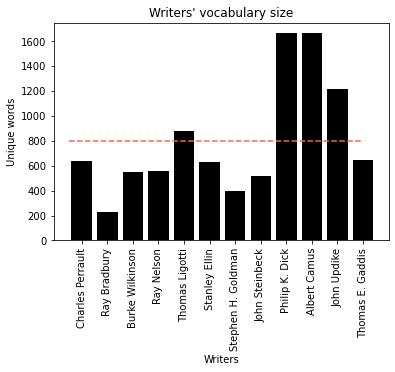

In [19]:
# plot vocabulary size per each writer 

plt.bar('writer', 'size', data = vocab, color = 'k')
plt.xticks(rotation = 'vertical')
plt.hlines(y = 799.66, xmin = -.5, xmax = 11, color = 'tomato', linestyles = '--')
plt.ylabel('Unique words')
plt.xlabel('Writers')
plt.title('Writers\' vocabulary size')
plt.show()

## 3. Sentiment analysis  

In [27]:
corpus

,text
Albert Camus,ivan karamazov and the rebellion against god b...
Burke Wilkinson,by burke wilkinson c s forester has two skills...
Charles Perrault,author charles perrault original dates and pla...
John Steinbeck,of mice and men author john steinbeck original...
John Updike,personal history telling how the writer has li...
Philip K. Dick,by philip k dick heres a wry little storybut o...
Ray Bradbury,fahrenheit author ray bradbury original date a...
Ray Nelson,heres one of the classic sf paranoia stories a...
Stanley Ellin,by stanley ellin and this said laffler is sbir...
Stephen H. Goldman,by stanley ellin and this said laffler is sbir...


In [38]:
# add sentiment analysis using TextBlomb 

polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x : TextBlob(x).sentiment.subjectivity 

corpus['polarity'] = pd.DataFrame(corpus.text.apply(polarity))
corpus['subjectivity'] = pd.DataFrame(corpus.text.apply(subjectivity))
corpus

,text,polarity,subjectivity
Albert Camus,ivan karamazov and the rebellion against god b...,0.050840,0.583215
Burke Wilkinson,by burke wilkinson c s forester has two skills...,0.169594,0.491222
Charles Perrault,author charles perrault original dates and pla...,0.040251,0.458147
John Steinbeck,of mice and men author john steinbeck original...,0.029540,0.462260
John Updike,personal history telling how the writer has li...,0.097406,0.476491
Philip K. Dick,by philip k dick heres a wry little storybut o...,0.002900,0.498179
Ray Bradbury,fahrenheit author ray bradbury original date a...,0.084086,0.394680
Ray Nelson,heres one of the classic sf paranoia stories a...,0.024505,0.454370
Stanley Ellin,by stanley ellin and this said laffler is sbir...,0.080036,0.529057
Stephen H. Goldman,by stanley ellin and this said laffler is sbir...,0.080036,0.529057


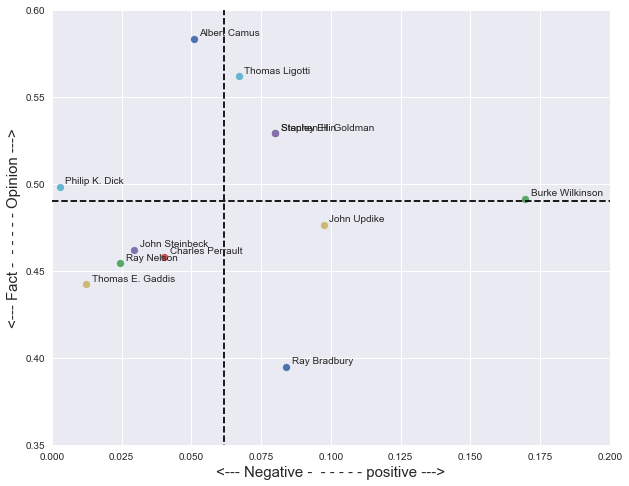

In [90]:
# Plot sentiment analysis for each writer 

plt.style.use('seaborn')

plt.rcParams['figure.figsize'] = [10,8]
for index, writer in enumerate(corpus.index):
    x = corpus.polarity[writer]
    y = corpus.subjectivity[writer]
    plt.scatter(x, y)
    plt.text(x = x+0.002, y = y+0.002, s= writer)
plt.xlabel('<--- Negative -  - - - - - positive --->', fontsize = 15)
plt.ylabel('<--- Fact -  - - - - - Opinion --->', fontsize = 15)
plt.vlines(x = np.mean(corpus.polarity), ymin = 0, ymax = 1, linestyles = '--')
plt.hlines(y = np.mean(corpus.subjectivity), xmin = 0, xmax = 1, linestyles = '--')
plt.ylim(.35,0.6)
plt.xlim(0,0.2)
plt.show()

From this plot we can notice that:
* fatcs are negative, life is not easy and it is not positive.
* Phillip K. Dick and Burke Willkinson are quite on the same wave of subjectivity but very opposit in polarity.